# NumPy

## Mais sobre Tipos de Dados

### Casting

O tipo “maior” vence em operações de tipo misto, por exemplo:

In [3]:
import numpy as np

a = np.array([1, 2, 3]) + 1.5
a

array([2.5, 3.5, 4.5])

In [4]:
a.dtype

dtype('float64')

A **atribuição** nunca muda o tipo!

In [5]:
b = np.array([1, 2, 3])
print(f'b = {b}, tipo = {b.dtype}')

b = [1 2 3], tipo = int64


Float é truncado para inteiro:

In [6]:
b[0] = 1.3
b

array([1, 2, 3])

Casts forçados:

In [8]:
c = np.array([1.7, 1.2, 1.6])
print(f'c = {c}, tipo = {c.dtype}')

c = [1.7 1.2 1.6], tipo = float64


Trucando para inteiro:

In [9]:
d = c.astype(int)
print(f'd = {d}, tipo = {d.dtype}')

d = [1 1 1], tipo = int64


Arredondamento:

In [10]:
a = np.array([1.2, 1.5, 1.6, 2.5, 3.5, 4.5])
a

array([1.2, 1.5, 1.6, 2.5, 3.5, 4.5])

Observe que continuará sendo floating point:

In [12]:
b = np.around(a)
print(f'b = {b}, tipo = {b.dtype}')

b = [1. 2. 2. 2. 4. 4.], tipo = float64


In [13]:
c = np.around(a).astype(int)
print(f'c = {c}, tipo = {c.dtype}')

c = [1 2 2 2 4 4], tipo = int64


### Tipos Diferentes de Dados

Inteiros (signed):

|   |   |
|---|---|
| **int8**  | 8 bits |
| **int16**  | 16 bits |
| **int32**  | 32 bits (o mesmo que int na plataforma de 32 bits) |
| **int64**  | 64 bits (o mesmo que int na plataforma de 64 bits) |

In [14]:
np.array([1], dtype=int).dtype

dtype('int64')

In [15]:
np.iinfo(np.int32).max, 2**31 - 1

(2147483647, 2147483647)

Inteiros (unsigned):

|   |   |
|---|---|
| **uint8**  | 8 bits |
| **uint16**  | 16 bits |
| **uint32**  | 32 bits |
| **uint64**  | 64 bits |

In [16]:
np.iinfo(np.uint32).max, 2**32 - 1

(4294967295, 4294967295)

Números Floating-point:

|   |   |
|---|---|
| **float16**  | 16 bits |
| **float32**  | 32 bits |
| **float64**  | 64 bits (mesmo que float) |
| **float96**  | 96 bits dependente da plataforma (igual a **np.longdouble**) |
| **float128**  | 128 bits dependente da plataforma (igual a **np.longdouble**) |

In [17]:
np.finfo(np.float32).eps

1.1920929e-07

In [18]:
np.finfo(np.float64).eps

2.220446049250313e-16

In [19]:
np.float32(1e-8) + np.float32(1) == 1

True

In [20]:
np.float64(1e-8) + np.float64(1) == 1

False

Números Floating-point complexos:

|   |   |
|---|---|
| **complex64**  | dois 32 bits floats |
| **complex128**  | dois 64 bits floats |
| **complex192**  | dois 96 bits floats (dependente da plataforma) |
| **complex256**  | dois 128 bits floats (dependente da plataforma) |

In [25]:
np.complex64(1.5 + 6j)

(1.5+6j)

### Tipos de Dados Menores

Comparação sobre o uso de float32 em vez de float64.

- Metade do tamanho na memória e no disco.

- Metade da largura de banda da memória necessária (pode ser um pouco mais rápido em algumas operações)

In [28]:
a = np.zeros((int(1e6),), dtype=np.float64)
a

array([0., 0., 0., ..., 0., 0., 0.])

In [29]:
b = np.zeros((int(1e6),), dtype=np.float32)
b

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [30]:
%timeit a*a

886 µs ± 141 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
%timeit b*b

289 µs ± 18.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Float32 é mais rápido, **mas**: 

Erros de arredondamento maiores - às vezes em lugares surpreendentes (ou seja, não os use a menos que você realmente precise deles)

### Tipos de Dados Estruturados


|   |   |
|---|---|
| **sensor_code**  | (string de 4 caracteres) |
| **position**  | (float) |
| **value**  | (float) |

In [32]:
samples = np.zeros((6,), dtype=[('sensor_code', 'S4'),('position', float), ('value', float)])
samples

array([(b'', 0., 0.), (b'', 0., 0.), (b'', 0., 0.), (b'', 0., 0.),
       (b'', 0., 0.), (b'', 0., 0.)],
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

In [33]:
samples.ndim

1

In [34]:
samples.dtype.names

('sensor_code', 'position', 'value')

In [35]:
samples[:] = [('ALFA',   1, 0.37), ('BETA', 1, 0.11), ('TAU', 1,   0.13),
              ('ALFA', 1.5, 0.37), ('ALFA', 3, 0.11), ('TAU', 1.2, 0.13)]
samples 

array([(b'ALFA', 1. , 0.37), (b'BETA', 1. , 0.11), (b'TAU', 1. , 0.13),
       (b'ALFA', 1.5, 0.37), (b'ALFA', 3. , 0.11), (b'TAU', 1.2, 0.13)],
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

O acesso ao campo funciona indexando com nomes de campo:

In [36]:
samples['sensor_code']    

array([b'ALFA', b'BETA', b'TAU', b'ALFA', b'ALFA', b'TAU'], dtype='|S4')

In [37]:
samples['value']

array([0.37, 0.11, 0.13, 0.37, 0.11, 0.13])

In [38]:
samples[0]

(b'ALFA', 1., 0.37)

In [41]:
samples[0]['sensor_code'] = 'TAU'
samples[0] 

(b'TAU', 1., 0.37)

Vários campos de uma vez:

In [42]:
samples[['position', 'value']] 

array([(1. , 0.37), (1. , 0.11), (1. , 0.13), (1.5, 0.37), (3. , 0.11),
       (1.2, 0.13)],
      dtype={'names':['position','value'], 'formats':['<f8','<f8'], 'offsets':[4,12], 'itemsize':20})

A indexação **"fancy"** funciona, como de costume:

In [43]:
samples[samples['sensor_code'] == b'ALFA']  

array([(b'ALFA', 1.5, 0.37), (b'ALFA', 3. , 0.11)],
      dtype=[('sensor_code', 'S4'), ('position', '<f8'), ('value', '<f8')])

Para mais detalhes sobre **structured arrays**, visite a documentação: [NumPy Docs](https://numpy.org/doc/stable/user/basics.rec.html)

### Polinômios

NumPy também contém polinômios em bases diferentes:

Por exemplo: $3x^2 + 2x - 1$

In [44]:
p = np.poly1d([3, 2, -1])
p

poly1d([ 3,  2, -1])

In [45]:
p(0)

-1

In [46]:
p(1)

4

In [49]:
p.roots

array([-1.        ,  0.33333333])

In [50]:
p.order

2

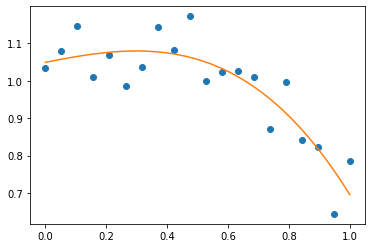

In [52]:
import matplotlib.pyplot as plt

x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3 * np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 3))
t = np.linspace(0, 1, 200) # usamos um número maior de pontos para uma plotagem mais suave
plt.plot(x, y, 'o', t, p(t), '-');

Para mais informações sobre polinômios, visite a documentação: [NumPy Docs](https://numpy.org/doc/stable/reference/routines.polynomials.poly1d.html)

### Carregando Arquivos de Dados

Arquivos textos

Exemplo: **colheita.txt**

```
# ano	cebola	cenoura	tomate
1900	30e3	4e3	    48300
1901	47.2e3	6.1e3	48200
1902	70.2e3	9.8e3	41500
1903	77.4e3	35.2e3	38200
1904	36.3e3	59.4e3	40600
1905	20.6e3	41.7e3	39800
1906	18.1e3	19e3	38600
1907	21.4e3	13e3	42300
1908	22e3	8.3e3	44500
1909	25.4e3	9.1e3	42100
1910	27.1e3	7.4e3	46000
1911	40.3e3	8e3	    46800
1912	57e3	12.3e3	43800
1913	76.6e3	19.5e3	40900
1914	52.3e3	45.7e3	39400
1915	19.5e3	51.1e3	39000
1916	11.2e3	29.7e3	36700
1917	7.6e3	15.8e3	41800
1918	14.6e3	9.7e3	43300
1919	16.2e3	10.1e3	41300
1920	24.7e3	8.6e3	47300
```

Carregando os dados:

In [53]:
dados = np.loadtxt('colheita.txt')
dados

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

Salvando os dados:

In [54]:
np.savetxt('colheitas.txt', dados)

In [55]:
data = np.loadtxt('colheitas.txt')
data

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

Lembrete: Navegando no sistema de arquivos com **IPython / Jupyter**

Diretório atual:

In [56]:
pwd

'/home/akira/Documentos/Cursos/Computação Numérica'

Home:

In [57]:
cd ~

/home/akira


Documentos:

In [59]:
cd Documentos

/home/akira/Documentos


Listando arquivos e diretórios:

In [60]:
ls

 2021     'Cyber Underground'/   Javascript/    Python/
 Bash/     Electromagnetism/     lmms/         'william gibson__O6q7Sz'/
 CC33Z    'Estudos C & C++'/     PKD__s9q6a8/  'Wolfram Player'/
 Cursos/   GitHub/               Publicações/   Wordpress/


In [66]:
cd Cursos/Computação\ Numérica

/home/akira/Documentos/Cursos/Computação Numérica


### Trabalhando com Imagens

Usando **matplotlib**:

In [86]:
img = plt.imread('mandelbrot.png')
print(img)

[[[0.12941177 0.42745098 0.79607844]
  [0.12941177 0.42745098 0.79607844]
  [0.12941177 0.42745098 0.79607844]
  ...
  [0.19607843 0.5294118  0.84705883]
  [0.19607843 0.5294118  0.84705883]
  [0.19607843 0.5294118  0.84705883]]

 [[0.12941177 0.42745098 0.79607844]
  [0.12941177 0.42745098 0.79607844]
  [0.12941177 0.42745098 0.79607844]
  ...
  [0.2        0.53333336 0.8509804 ]
  [0.2        0.53333336 0.8509804 ]
  [0.2        0.53333336 0.8509804 ]]

 [[0.12941177 0.42745098 0.79607844]
  [0.12941177 0.42745098 0.79607844]
  [0.12941177 0.42745098 0.79607844]
  ...
  [0.2        0.53333336 0.8509804 ]
  [0.2        0.53333336 0.8509804 ]
  [0.2        0.53333336 0.8509804 ]]

 ...

 [[0.1882353  0.50980395 0.8392157 ]
  [0.18431373 0.5058824  0.8352941 ]
  [0.18431373 0.5058824  0.8352941 ]
  ...
  [0.13725491 0.43529412 0.8039216 ]
  [0.13725491 0.43529412 0.8039216 ]
  [0.13725491 0.43529412 0.8039216 ]]

 [[0.1882353  0.50980395 0.8392157 ]
  [0.18431373 0.5058824  0.8352941 ]


In [87]:
print(f'Formato: {img.shape}, Tipos de dados: {img.dtype}')

Formato: (413, 550, 3), Tipos de dados: float32


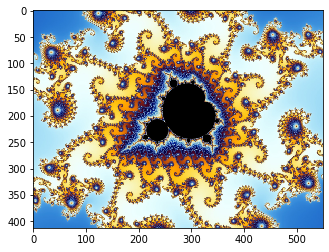

In [97]:
plt.imshow(img);
plt.savefig('mandel.png');

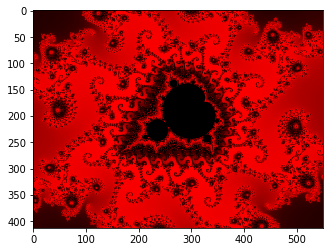

In [98]:
red_img = img.copy()
red_img[:,:,1] = 0
red_img[:,:,2] = 0
plt.imshow(red_img);

In [99]:
plt.imsave('gray_mandel.png', img[:,:,0], cmap=plt.cm.gray)

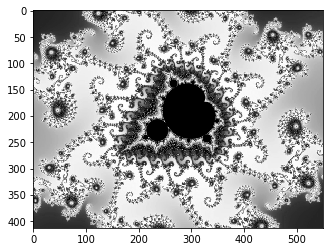

In [100]:
plt.imshow(plt.imread('gray_mandel.png'));

In [104]:
plt.imsave('twilight_mandel.png', img[:,:,0],cmap=plt.cm.twilight)

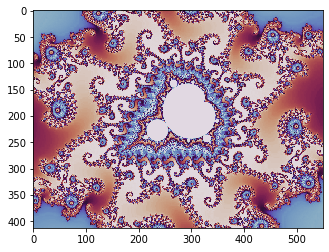

In [105]:
plt.imshow(plt.imread('twilight_mandel.png'));

In [106]:
plt.imsave('green_mandel.png', img[:,:,0],)

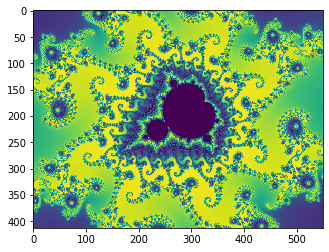

In [107]:
plt.imshow(plt.imread('green_mandel.png'));

In [108]:
img.sort()

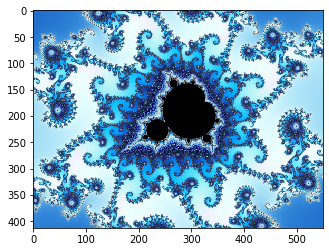

In [109]:
plt.imshow(img);

### LCM Lowest Common Multiple

Encontrando o **Menor Múltiplo Comum**.

O menor múltiplo comum é o menor número múltiplo comum de ambos os números.

In [114]:
n1 = 4
n2 = 6

x = np.lcm(n1,n2)

print(x)

12


Para encontrar o menor múltiplo comum de todos os valores em um array, podemos usar o método **reduce()**.

O método **reduce()** usará o ufunc, neste caso a função **lcm()**, em cada elemento, e reduzirá o array em uma dimensão.

In [115]:
arr = np.array([3, 6, 9])

y = np.lcm.reduce(arr)

print(y)

18


O resultado é **18** porque esse é o menor múltiplo comum de todos os três números (`3 * 6 = 18`, `6 * 3 = 18` e `9 * 2 = 18`).

Encontre o menor múltiplo comum de todo um array onde o array contém todos os inteiros de **1** a **10**:

In [116]:
arr = np.arange(1, 11)

z = np.lcm.reduce(arr)

print(z)

2520


### GCD Greatest Common Denominator

Encontrando o **Maior Denominador Comum**.

O maior denominador comum, também conhecido como maior fator comum é o maior número que é um fator comum de ambos os números.

In [117]:
n1 = 6
n2 = 9

x = np.gcd(n1, n2)

print(x)

3


**Retorna**: 3 porque esse é o número mais alto pelo qual ambos os números podem ser divididos (`6/3 = 2` e `9/3 = 3`).

Para encontrar o fator comum mais alto de todos os valores em um array, podemos usar o método **reduce()**.

In [118]:
arr = np.array([20, 8, 32, 36, 16])

y = np.gcd.reduce(arr)

print(y)

4


### Funções Trigonométricas

NumPy fornece os ufuncs **sin()**, **cos()** e **tan()** que assumem valores em radianos e produzem os valores de sin, cos e tan correspondentes.

Encontre o valor do seno de $\frac{\pi}{2}$:

In [119]:
x = np.sin(np.pi/2)
print(x)

1.0


Encontre valores seno para todos os valores em um array:

In [120]:
arr = np.array([np.pi/2, np.pi/3, np.pi/4, np.pi/5])

y = np.sin(arr)
print(y)

[1.         0.8660254  0.70710678 0.58778525]


### Converter Graus em Radianos

Por padrão, todas as funções trigonométricas usam radianos como parâmetros, mas também podemos converter radianos em graus e vice-versa em NumPy.

Nota: os valores em radianos são `pi / 180 * valor_grau`.

Convertendo todos os valores do seguinte array **arr** em radianos:

In [121]:
arr = np.array([90, 180, 270, 360])

x = np.deg2rad(arr)
print(x)

[1.57079633 3.14159265 4.71238898 6.28318531]


Convertendo todos os valores do seguinte array em graus:

In [122]:
arr = np.array([np.pi/2, np.pi, 1.5*np.pi, 2*np.pi])

y = np.rad2deg(arr)
print(y)

[ 90. 180. 270. 360.]


### Hipotenusa

Encontrando **hipotenusa** usando o [teorema de Pitágoras](https://en.wikipedia.org/wiki/Pythagorean_theorem) em NumPy.

NumPy fornece a função **hypot()** que obtém os valores base e perpendiculares e produz a hipotenusa com base no teorema de Pitágoras.

Encontre a hipotenusa para base 4 e perpendiculare 3:

In [123]:
base = 3
perp = 4

x = np.hypot(base, perp)
print(x)

5.0
